In [1]:
library(ggplot2)
library(ggridges)
theme_set(theme_minimal())
library('transformeR')


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.



In [52]:
load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata',verbose = TRUE)

Loading objects:
  ba.mergeGrid5


In [53]:
load('../3.Datos generados/dataframes/df.series_grid_5.Rdata',verbose = TRUE)

Loading objects:
  df.seriesTemporales_conCoords


In [54]:
load('../3.Datos generados/dataframes/df_grid_5.Rdata',verbose = TRUE)
df.fireSeasson = df

Loading objects:
  df


In [55]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (all(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}

In [56]:
df_sinCeros[1:10,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-157.5_17.5,-157.5,17.5,8.537555,167.94650,102.23748,0.9757182,70.78624,61.07549,330.5478,1047.7494,104.8866,112.5342,19.34492,63.88650
-157.5_22.5,-157.5,22.5,26.344468,62.69385,115.79825,125.6240955,71.29733,282.15175,590.1779,619.0135,560.5821,217.3675,84.84128,59.01965
-122.5_37.5,-122.5,37.5,618.755855,84.25837,69.27618,1708.4877364,2745.30994,7410.61160,17981.7212,43957.0369,32520.1744,26812.8418,20958.38060,2080.40000
-122.5_42.5,-122.5,42.5,531.036173,458.50596,730.13060,1335.3700182,1616.43042,3304.28220,30074.5662,80886.9974,67942.6008,16887.2475,5730.85188,901.86831
-122.5_47.5,-122.5,47.5,84.643805,10.00114,17.80690,160.9939682,547.53017,2987.60453,20544.7520,24790.5938,18111.7381,7964.0189,4827.75458,250.94613
-122.5_57.5,-122.5,57.5,430.049077,209.53608,36.30921,1404.7980227,4427.69585,2097.22947,6374.0469,5278.6166,2328.7774,1000.3904,565.77883,175.04898
-117.5_32.5,-117.5,32.5,784.874832,757.86811,98.79175,463.0558955,5358.17522,11687.73178,14264.1308,15533.4921,17928.2848,18744.1274,15342.80331,5922.85934
-117.5_37.5,-117.5,37.5,360.734723,88.62161,21.95371,212.9511318,1242.46736,6576.96429,17870.9162,17901.2466,18313.6895,11104.2118,2670.78609,364.68725
-117.5_42.5,-117.5,42.5,57.323609,161.31846,209.69908,700.5233545,1302.05933,3694.53478,98225.0731,97910.8756,31640.9558,12849.3690,1462.27086,50.11785


Picking joint bandwidth of 2.27

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 2.27



,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
422,-122.5,37.5,1,1,9,NA,NA,9,0.7063497,0.6500246,0.4750457


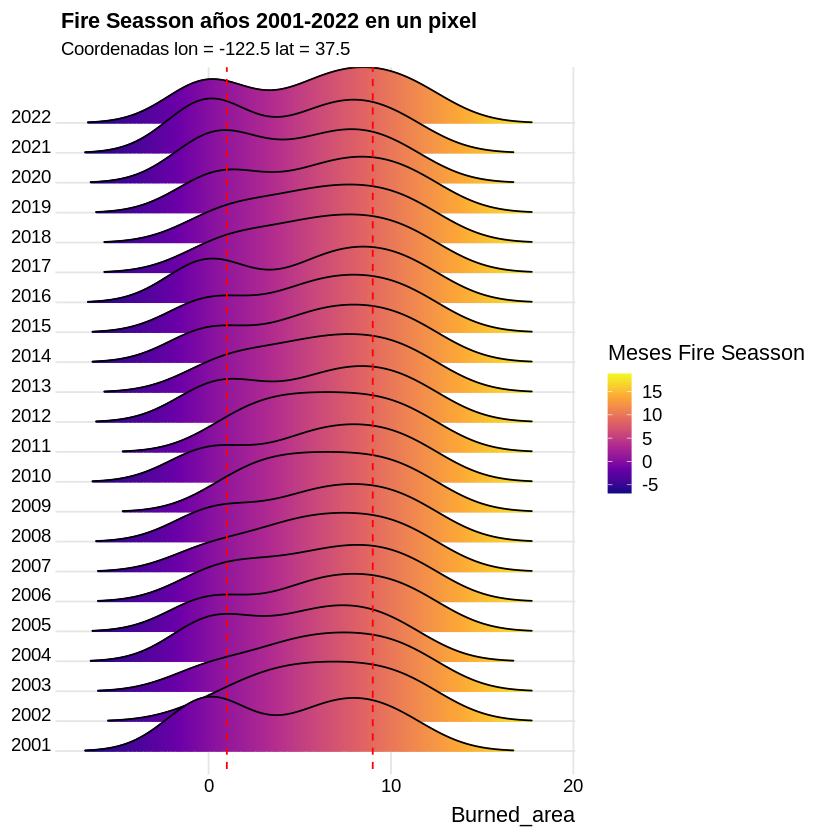

In [9]:
x = df_sinCeros$'coord_x'[3]
y = df_sinCeros$'coord_y'[3]
df2 <- data.frame()
for (year in 2001:2022){
    for (season in 1:12){
        subgrid <- subsetGrid(grid = ba.mergeGrid5, year = year, season = season, lonLim  = x, latLim  = y)
        df2 <- rbind(df2, c(year, season, subgrid$Data))
    }        
}
colnames(df2) = c('Year', 'Month','Burned_area')
df2$Year <- as.character(df2$Year)
for (row in 1:nrow(df2)){
    if (df2$Burned_area[row] != 0){
        df2$Burned_area[row] = df2$Month[row]
    }
}

startFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_start
endFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_end
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Meses Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 en un pixel',
    subtitle = paste0('Coordenadas ','lon = ',x,' lat = ',y)
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank()) +
  geom_vline(xintercept = c(startFireSeasson, endFireSeasson), color = "red", linetype = "dashed")
ggsave(paste0('FireSeasson',x,'_',y,'.png'))

df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]

Hacer visualización por mes también de cad auno de los clusteres

Picking joint bandwidth of 2.3

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 2.3



,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
425,-122.5,52.5,1,1,1,3,7,6,0.872338,1.104374,0.9706786


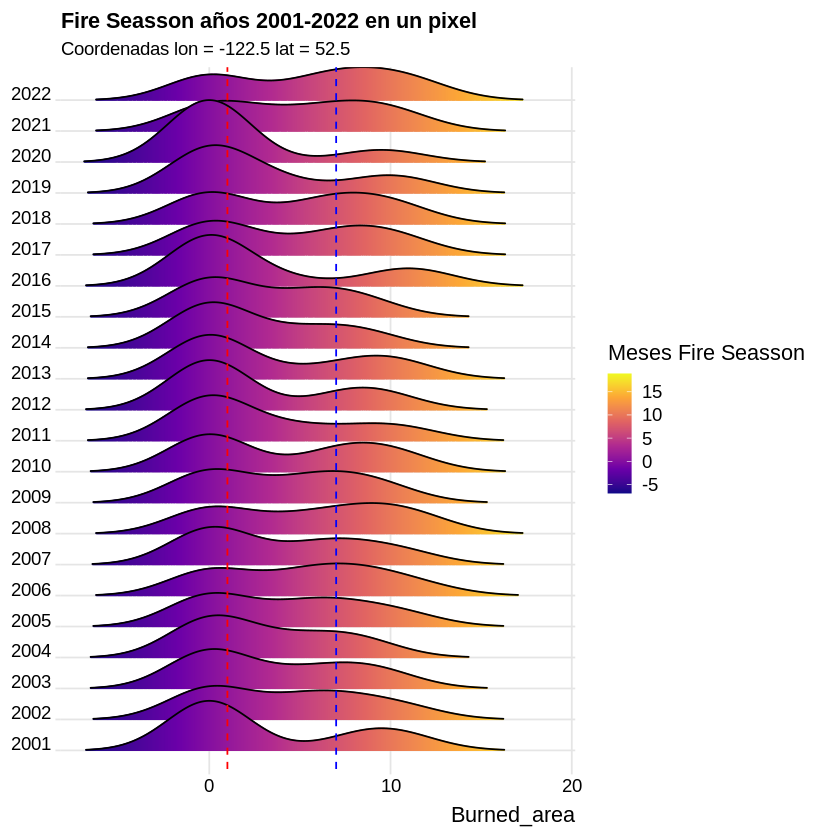

In [10]:
x = -122.5
y = 52.5
df2 <- data.frame()
for (year in 2001:2022){
    for (season in 1:12){
        subgrid <- subsetGrid(grid = ba.mergeGrid5, year = year, season = season, lonLim  = x, latLim  = y)
        df2 <- rbind(df2, c(year, season, subgrid$Data))
    }        
}
colnames(df2) = c('Year', 'Month','Burned_area')
df2$Year <- as.character(df2$Year)
for (row in 1:nrow(df2)){
    if (df2$Burned_area[row] != 0){
        df2$Burned_area[row] = df2$Month[row]
    }
}

startFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_start
endFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_end
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Meses Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 en un pixel',
    subtitle = paste0('Coordenadas ','lon = ',x,' lat = ',y)
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank()) +
  geom_vline(xintercept = c(startFireSeasson, endFireSeasson), color = "red", linetype = "dashed") +
  geom_vline(xintercept = 7, color = "blue", linetype = "dashed")
ggsave(paste0('FireSeasson',x,'_',y,'.png'))
df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]

Picking joint bandwidth of 2.3



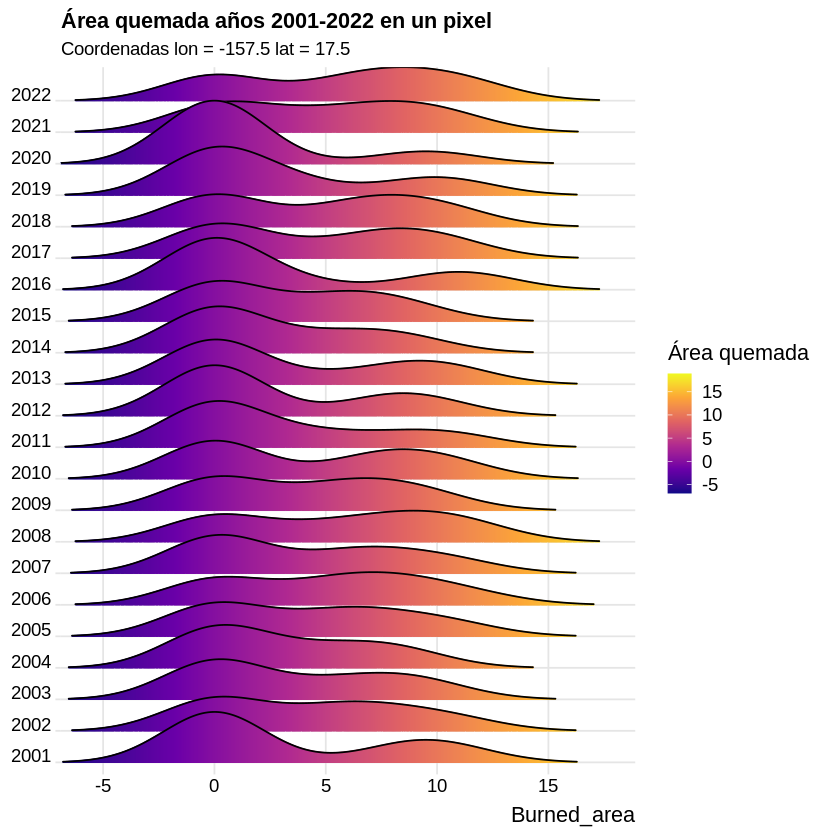

In [ ]:
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_discrete(expand = expansion(mult = c(0.01, 0.01)))+
  scale_fill_viridis_c(name = "Área quemada", option = "C") +
  labs(
    title = 'Área quemada años 2001-2022 en un pixel',
    subtitle = 'Coordenadas lon = -157.5 lat = 17.5'
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank())

********************************************************************************************************************

### Estación de incendios de ejemplo

In [1]:
library('visualizeR')
library('transformeR')

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [2]:
quantity2clim <- function(quantity, what, ref.grid, backperm = NULL) {
  if(!is.null(backperm)){quantity <- quantity[backperm]}
  mat <- matrix(quantity, nrow = 1)  
  ref.grid$Data <- mat2Dto3Darray(mat, x = ref.grid$xyCoords$x , y = ref.grid$xyCoords$y)
  attr(ref.grid$Data, "climatology:fun") <- what
  return(ref.grid)
}

In [3]:
load('../3.Datos generados/dataframes/df.series_grid_25.Rdata',verbose = TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_25.Rdata',verbose = TRUE)
load('../1.Upscaling/upscaling_fba/ fba_grid_25.Rdata',verbose = TRUE)
df_fireSeasson <- get(load('../3.Datos generados/dataframes/df_grid_25.Rdata',verbose = TRUE))

Loading objects:
  df.seriesTemporales_conCoords
Loading objects:
  ba.mergeGrid25
Loading objects:
  fba_25
Loading objects:
  df


In [4]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (all(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}

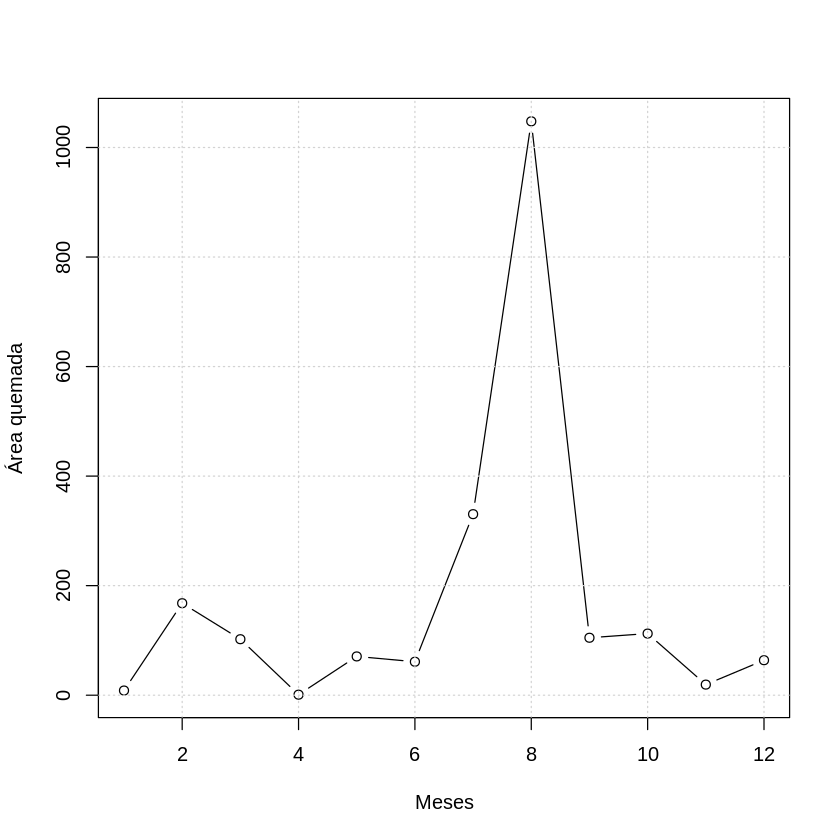

In [5]:
item = 1
x = df_sinCeros[item,]$coord_x
y = df_sinCeros[item,]$coord_y
area_quemada = unlist(df_sinCeros[item,3:14])
meses = seq(1,12)
plot(meses,area_quemada, type = 'b', xlab = 'Meses',ylab = "Área quemada")
grid()

Vamos a incluir también sus desviaciones

In [6]:
func.mediasMensuales <- function(grid, x, y, func = mean){
        results <- c()
        for (season in 1:12){
            new_grid <- subsetGrid(grid = grid,season = season, lonLim  = x, latLim  = y)
            var_name <- paste("season", season, sep = "_")
            assign(var_name,new_grid)
            results <- c(results, func(get(var_name)$Data))
        }
        return(results)
}
minimo = func.mediasMensuales(grid = ba.mergeGrid25, x = x, y = y, func = min)
maximo = func.mediasMensuales(grid = ba.mergeGrid25, x = x, y = y, func = max)
medias = func.mediasMensuales(grid = ba.mergeGrid25, x = x, y = y, func = mean) 
desviacion = func.mediasMensuales(grid = ba.mergeGrid25, x = x, y = y, func = sd) 

In [7]:
df_fireSeasson[df_fireSeasson$coord_x == x & df_fireSeasson$coord_y == y,]

,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
692,-156.25,18.75,1,1,7,NA,NA,7,0.5838276,1.139154,0.09461361


png 
  2

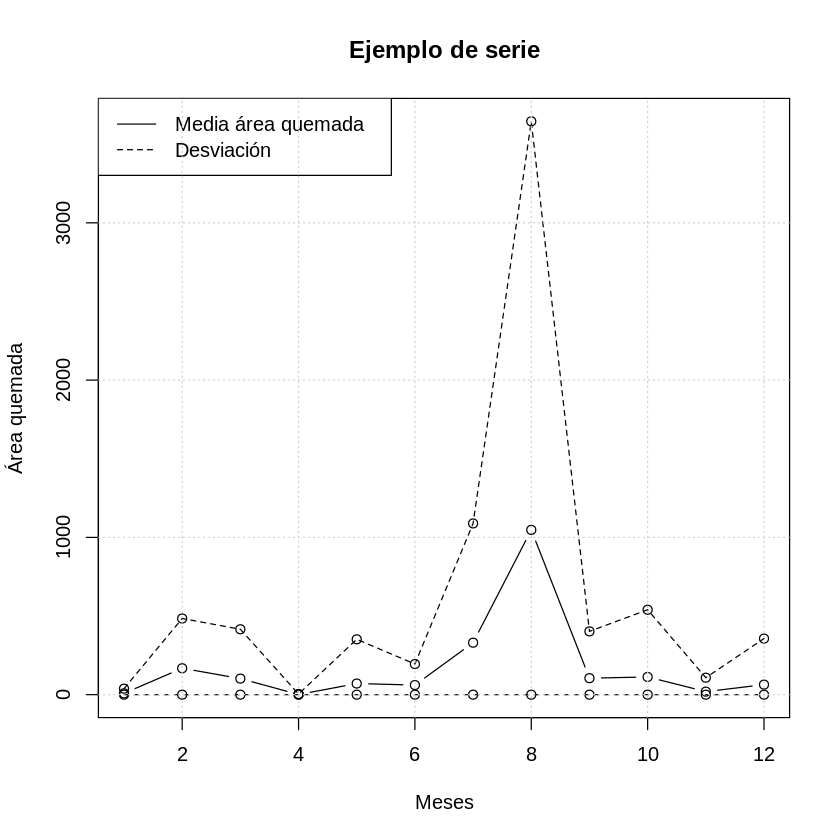

In [122]:
area_quemada = unlist(df_sinCeros[item,3:14])
arriba = area_quemada + desviacion
meses = seq(1,12)
plot(meses,area_quemada, type = 'b', xlab = 'Meses',ylab = "Área quemada", ylim = range(c(minimo, arriba)), main = 'Ejemplo de serie')
points(meses, arriba) 
lines(meses, arriba, lty = 2)  # Línea arriba de la media
points(meses, minimo,lty = 2 )
lines(meses, minimo,lty = 2 )
abline(v = )
#points(meses, maximo,lty = 2, col = 'red' )
#lines(meses, maximo,lty = 2, col = 'red' )
legend("topleft", legend = c("Media área quemada", "Desviación"), 
       col = c("black", "black"), lty = c(1, 2))

grid()

png("ejemploSerie.png")

plot(meses,area_quemada, type = 'b', xlab = 'Meses',ylab = "Área quemada", ylim = range(c(minimo, arriba)), main = 'Ejemplo de serie')
points(meses, arriba, col = 'black') 
lines(meses, arriba, lty = 2, col = 'black')  # Línea arriba de la media
points(meses, minimo,lty = 2 )
lines(meses, minimo,lty = 2 )
#points(meses, maximo,lty = 2, col = 'red' )
#lines(meses, maximo,lty = 2, col = 'red' )
legend("topleft", legend = c("Media área quemada", "Desviación"), 
       col = c("black", "black"), lty = c(1, 2))
grid()
dev.off()

## Clusterización: Visualización Centroides

In [28]:
library(ggplot2)
library(ggridges)
theme_set(theme_minimal())
library('transformeR')

In [143]:
grid_05 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_05.Rdata'))
df.fireSeasson <- get(load('../3.Datos generados/dataframes/df_grid_05.Rdata'))
df.series <- get(load('../3.Datos generados/dataframes/df.series_grid_05.Rdata'))

In [572]:
df_centroides <- get(load('../5.Estudio/df_centroidesProximos.Rdata'))

### Cluster 1

In [661]:
cluster = 1
df <- df_centroides[[cluster]][1:8,]
vector_x <- df$X
vector_y <- df$Y

lista_df <- list()
for (i in 1:length(vector_x)){
   vector_pixel <- c()
    vector_años <- c()
    vector_meses <-c()
    x <- vector_x[i]
    y <- vector_y[i]
    for (year in 2001:2022){
        if (year != 2022){
                for (season in 1:12){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                    }
        }else{
                for (season in 1:4){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                }

            }

    }
    df_pixel <- data.frame(vector_años, vector_meses, vector_pixel)
    colnames(df_pixel) = c('Year', 'Month','Meses')
    df_pixel$Year <- as.character(df_pixel$Year)
    nomVar <- paste0(x,y)
    lista_df[[nomVar]] <- df_pixel
}



In [614]:
df_pr <- lista_df[[1]]
for (item in 2:length(lista_df)){
    df_pr <- rbind(df_pr, lista_df[[item]])
}

In [615]:
df_pr = df_pr[df_pr$Meses !=0,]
for (row in 1:nrow(df_pr)){
    year_i <- as.character(df_pr[row, ]$Year)
        if (df_pr$Meses[row] != 0){
            df_pr$Meses[row] = df_pr$Month[row] #*(df_pr$Burned_area[row]/unlist(lista_medias[year_i]))
    }
}

Picking joint bandwidth of 1.86

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 1.86



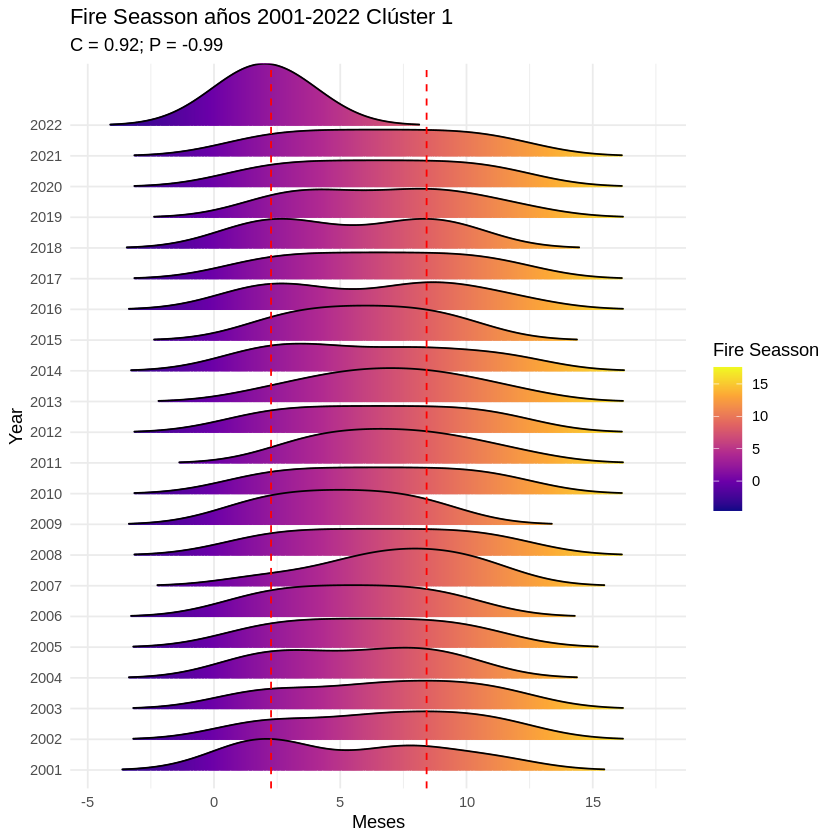

In [616]:
startFireSeasson = 4.77 
desvstart =4.77 -2.51
endFireSeasson = 5.85 
desvEnd =5.85 +2.57
ggplot(df1[df1$Meses !=0,], aes(x = Meses, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Fire Seasson", option = "C")  +
  labs(
    title = 'Fire Seasson años 2001-2022 Clúster 1',
    subtitle = 'C = 0.92; P = -0.99'
  ) +
 # theme_ridges(font_size = 13, grid = TRUE) + 
 # theme(axis.title.y = element_blank()) +
  #geom_vline(xintercept = c(startFireSeasson, endFireSeasson), color = "red", linetype = "solid")+
geom_vline(xintercept = c(desvstart, desvEnd), color = "red", linetype = "dashed")
ggsave(paste0('FS','densidades','_cluster_',cluster,'.png'))

Saving 6.67 x 6.67 in image



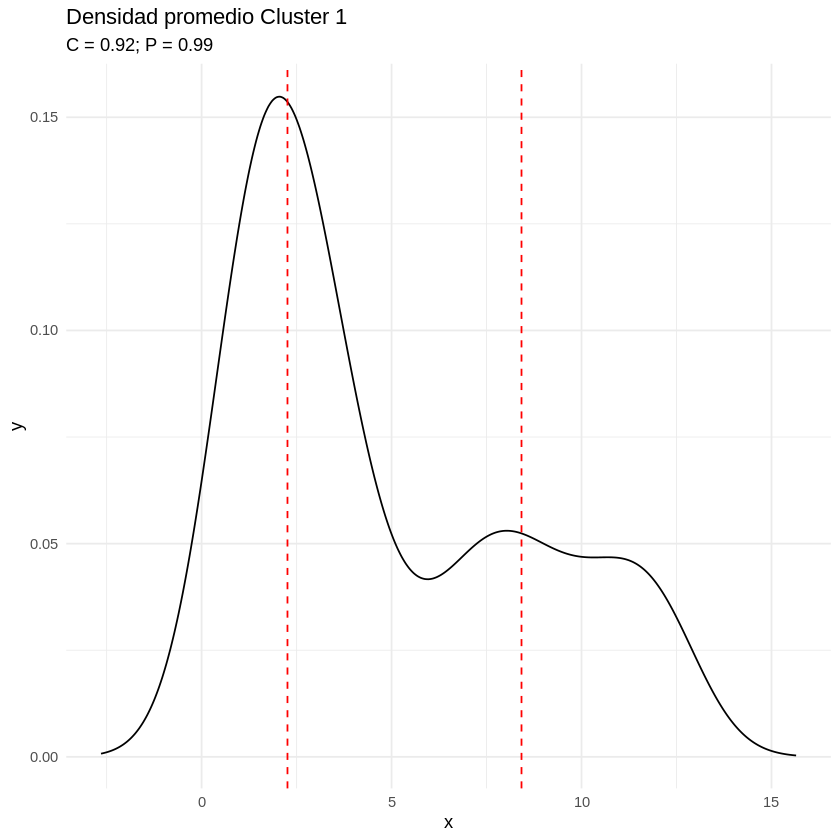

In [617]:
density_data <- density(df_pr$Meses)

# Crear un data frame con los resultados de la densidad
density_df <- data.frame(x = density_data$x, y = density_data$y)

# Crear el gráfico utilizando ggplot2
ggplot(density_df, aes(x = x, y = y)) +
  geom_line() +
  labs(
    title = 'Densidad promedio Cluster 1',
    subtitle = 'C = 0.92; P = 0.99'
  ) +
  geom_vline(xintercept = desvstart, color = 'red', linetype = 'dashed') +
  geom_vline(xintercept = desvEnd, color = 'red', linetype = 'dashed')+
  theme(panel.grid.minor.x = element_line(size = 0.25,
                                          linetype = 1))
ggsave(paste0('FS','densidad promedio','_cluster_',cluster,'.png'))

### Cluster 2

In [643]:
cluster = 2
df <- df_centroides[[cluster]]
vector_x <- df$X
vector_y <- df$Y

lista_df <- list()
for (i in 1:length(vector_x)){
   vector_pixel <- c()
    vector_años <- c()
    vector_meses <-c()
    x <- vector_x[i]
    y <- vector_y[i]
    for (year in 2001:2022){
        if (year != 2022){
                for (season in 1:12){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                    }
        }else{
                for (season in 1:4){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                }

            }

    }
    df_pixel <- data.frame(vector_años, vector_meses, vector_pixel)
    colnames(df_pixel) = c('Year', 'Month','Meses')
    df_pixel$Year <- as.character(df_pixel$Year)
    nomVar <- paste0(x,y)
    lista_df[[nomVar]] <- df_pixel
}




In [644]:
df_pr <- lista_df[[1]]
for (item in 2:length(lista_df)){
    df_pr <- rbind(df_pr, lista_df[[item]])
}

In [645]:
df_pr = df_pr[df_pr$Meses !=0,]
for (row in 1:nrow(df_pr)){
    year_i <- as.character(df_pr[row, ]$Year)
        if (df_pr$Meses[row] != 0){
            df_pr$Meses[row] = df_pr$Month[row] #*(df_pr$Burned_area[row]/unlist(lista_medias[year_i]))
    }
}

In [646]:
df_pr$Year <- as.character(df_pr$Year)

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 0.684

Picking joint bandwidth of 0.684



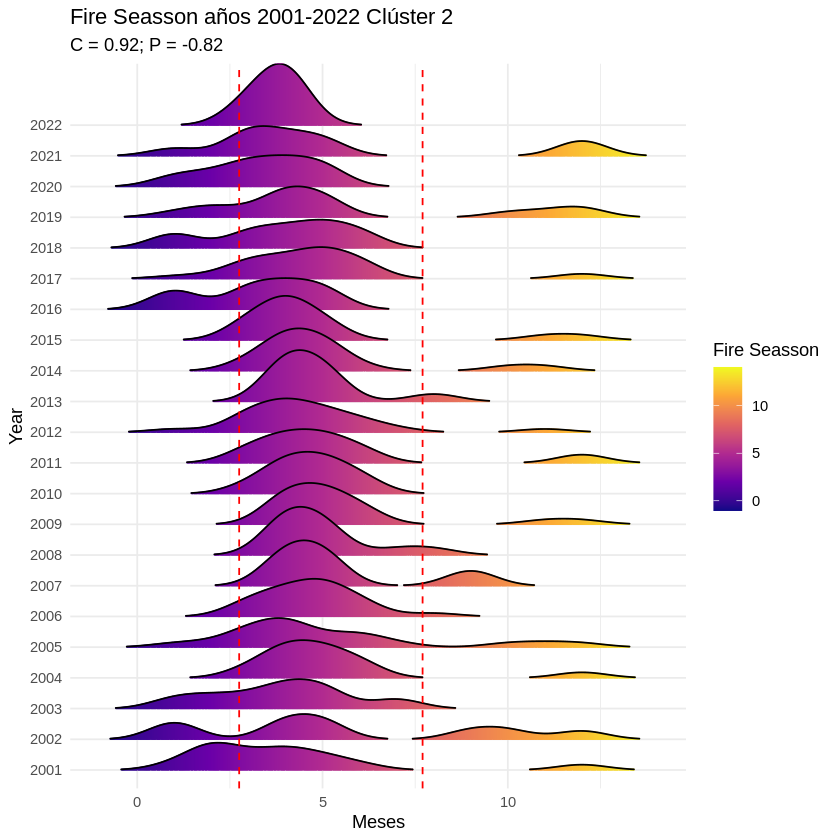

In [647]:
startFireSeasson = 5.01 
desvstart =startFireSeasson -2.26
endFireSeasson = 5.65 
desvEnd =endFireSeasson + 2.05

ggplot(df_pr, aes(x = Meses, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 Clúster 2',
    subtitle = 'C = 0.92; P = -0.82'
  ) +
geom_vline(xintercept = c(desvstart, desvEnd), color = "red", linetype = "dashed") +
#scale_x_continuous(limits = c(0, 11))
ggsave(paste0('FS','densidades','_cluster_',2,'.png'))

Saving 6.67 x 6.67 in image



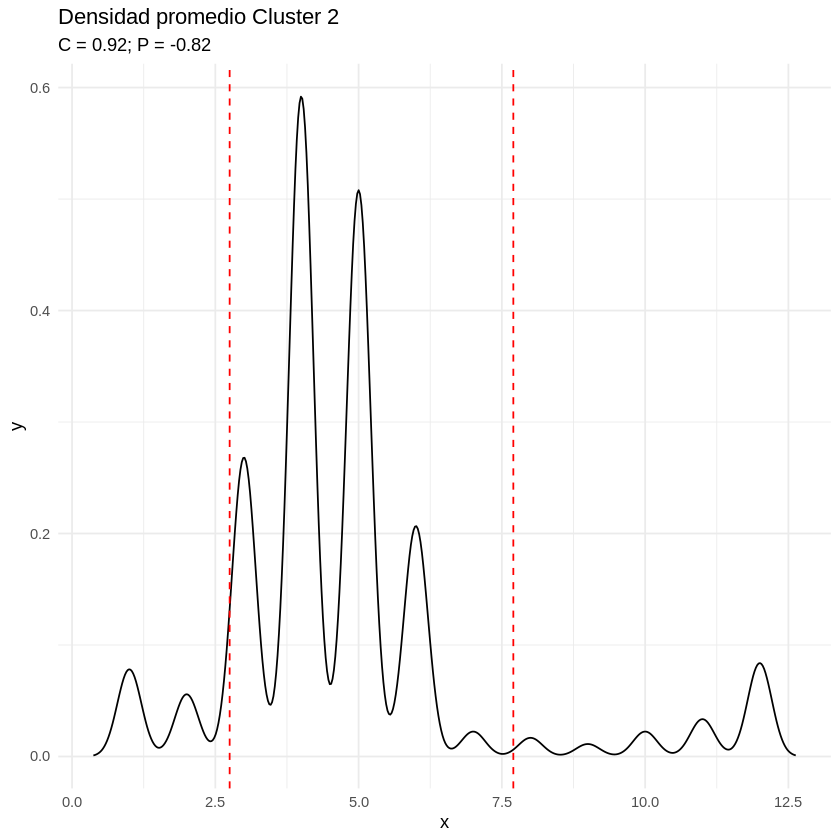

In [648]:
density_data <- density(df_pr$Meses)

# Crear un data frame con los resultados de la densidad
density_df <- data.frame(x = density_data$x, y = density_data$y)

# Crear el gráfico utilizando ggplot2
ggplot(density_df, aes(x = x, y = y)) +
  geom_line() +
  labs(
    title = 'Densidad promedio Cluster 2',
    subtitle = 'C = 0.92; P = -0.82'
  ) +
  geom_vline(xintercept = desvstart, color = 'red', linetype = 'dashed') +
  geom_vline(xintercept = desvEnd, color = 'red', linetype = 'dashed')+
  theme(panel.grid.minor.x = element_line(size = 0.25,
                                          linetype = 1))
ggsave(paste0('FS','densidad promedio','_cluster_',cluster,'.png'))

### Cluster 3

In [624]:
cluster = 3
df <- df_centroides[[cluster]]
vector_x <- df$X
vector_y <- df$Y

lista_df <- list()
for (i in 1:length(vector_x)){
   vector_pixel <- c()
    x <- vector_x[i]
    y <- vector_y[i]
    for (year in 2001:2022){
        if (year != 2022){
                for (season in 1:12){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    }
        }else{
                for (season in 1:4){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                }

            }

    }
    nomVar <- paste0(x,y)
    lista_df[[nomVar]] <- vector_pixel
}
vector_años <- c()
vector_meses <- c()
for (year in 2001:2022){
    if (year != 2022){
            for (season in 1:12){
                vector_años <- c(vector_años, year)
                vector_meses <- c(vector_meses, season)
                }
    }else{
            for (season in 1:4){
                vector_años <- c(vector_años, year)
                vector_meses <- c(vector_meses, season)
            }

        }

}
df2 <- data.frame(lista_df)
serie <- c()
for (row in 1:nrow(df2)){
    serie <- c(serie, mean(unlist(df2[row,])))
}
df1 <- data.frame(vector_años, vector_meses,serie)
colnames(df1) = c('Year', 'Month','Meses')

df1$Year <- as.character(df1$Year)

for (row in 1:nrow(df1)){
    if (df1$Meses[row] != 0){
        df1$Meses[row] = df1$Month[row]
    }
}
df1 = df1[df1$Meses !=0,]
startFireSeasson = 2.23
desvstart =startFireSeasson -1.35
endFireSeasson = 7.68
desvEnd =endFireSeasson + 1.83


Picking joint bandwidth of 1.86

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 1.86



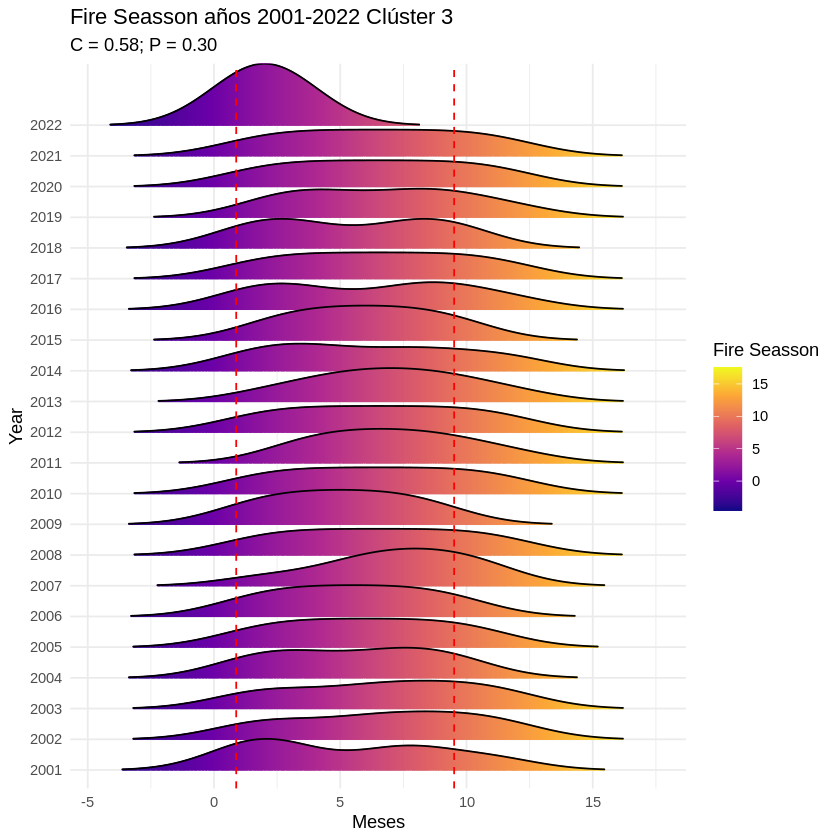

In [625]:
ggplot(df1, aes(x = Meses, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Fire Seasson", option = "C")  +
  labs(
    title = 'Fire Seasson años 2001-2022 Clúster 3',
    subtitle = 'C = 0.58; P = 0.30'
  ) + geom_vline(xintercept = c(desvstart, desvEnd), color = "red", linetype = "dashed")
ggsave(paste0('FS','densidades','_cluster_',3,'.png'))

Saving 6.67 x 6.67 in image



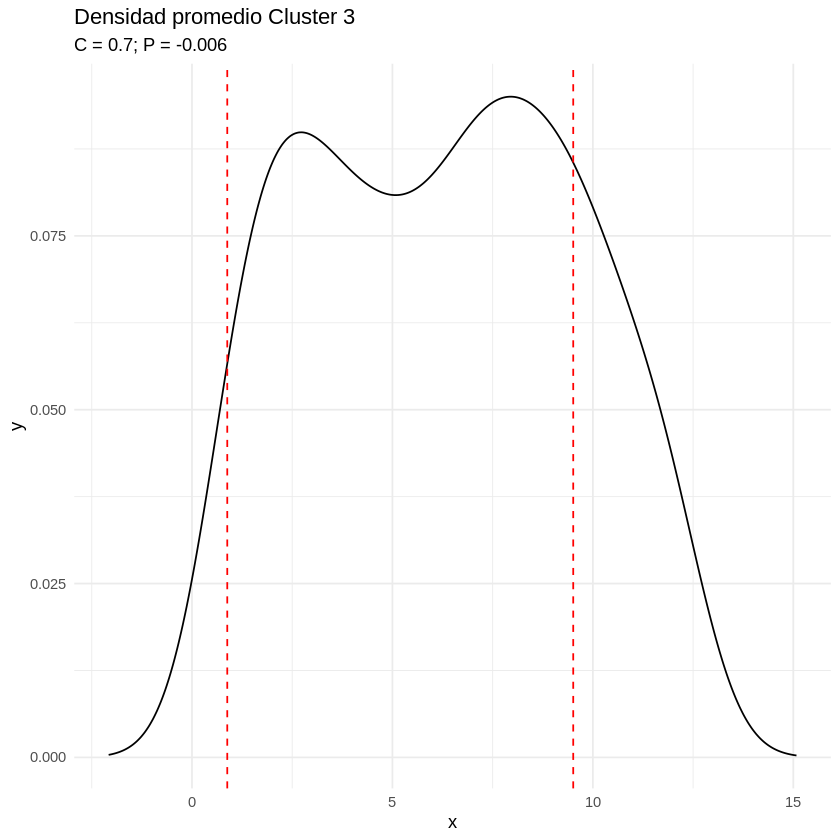

In [626]:
density_data <- density(df1$Meses)

# Crear un data frame con los resultados de la densidad
density_df <- data.frame(x = density_data$x, y = density_data$y)

# Crear el gráfico utilizando ggplot2
ggplot(density_df, aes(x = x, y = y)) +
  geom_line() +
  labs(
    title = 'Densidad promedio Cluster 3',
    subtitle = 'C = 0.7; P = -0.006'
  ) +
  geom_vline(xintercept = desvstart, color = 'red', linetype = 'dashed') +
  geom_vline(xintercept = desvEnd, color = 'red', linetype = 'dashed')+
  theme(panel.grid.minor.x = element_line(size = 0.25,
                                          linetype = 1))
ggsave(paste0('FS','densidad promedio','_cluster_',3,'.png'))

### Cluster 4

In [627]:
mean(df_clusters[df_clusters$cluster == 4, ]$SencondStar)
sd(df_clusters[df_clusters$cluster == 4, ]$SencondStar)
mean(df_clusters[df_clusters$cluster == 4, ]$SencondEnd)
sd(df_clusters[df_clusters$cluster == 4, ]$SencondEnd)

[1] 7.174109

[1] 2.3454

[1] 9.088956

[1] 1.788976

In [628]:
cluster = 4
df <- df_centroides[[cluster]]
vector_x <- df$X
vector_y <- df$Y

lista_df <- list()
for (i in 1:length(vector_x)){
   vector_pixel <- c()
    vector_años <- c()
    vector_meses <-c()
    x <- vector_x[i]
    y <- vector_y[i]
    for (year in 2001:2022){
        if (year != 2022){
                for (season in 1:12){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                    }
        }else{
                for (season in 1:4){
                    subgrid <- subsetGrid(grid = grid_05, year = year, season = season, lonLim  = x, latLim  = y)
                    vector_pixel <- c(vector_pixel, subgrid$Data)
                    vector_años <- c(vector_años, year)
                    vector_meses <-c(vector_meses, season)
                }

            }

    }
    df_pixel <- data.frame(vector_años, vector_meses, vector_pixel)
    colnames(df_pixel) = c('Year', 'Month','Meses')
    df_pixel$Year <- as.character(df_pixel$Year)
    nomVar <- paste0(x,y)
    lista_df[[nomVar]] <- df_pixel
}

In [636]:
df_pr <- lista_df[[1]]
for (item in 2:length(lista_df)){
    df_pr <- rbind(df_pr, lista_df[[item]])
}

In [637]:
df_pr = df_pr[df_pr$Meses !=0,]

In [638]:
for (row in 1:nrow(df_pr)){
    year_i <- as.character(df_pr[row, ]$Year)
        if (df_pr$Meses[row] != 0){
            df_pr$Meses[row] = df_pr$Month[row] #*(df_pr$Burned_area[row]/unlist(lista_medias[year_i]))
    }
}

Picking joint bandwidth of 1.74

Saving 6.67 x 6.67 in image

Picking joint bandwidth of 1.74



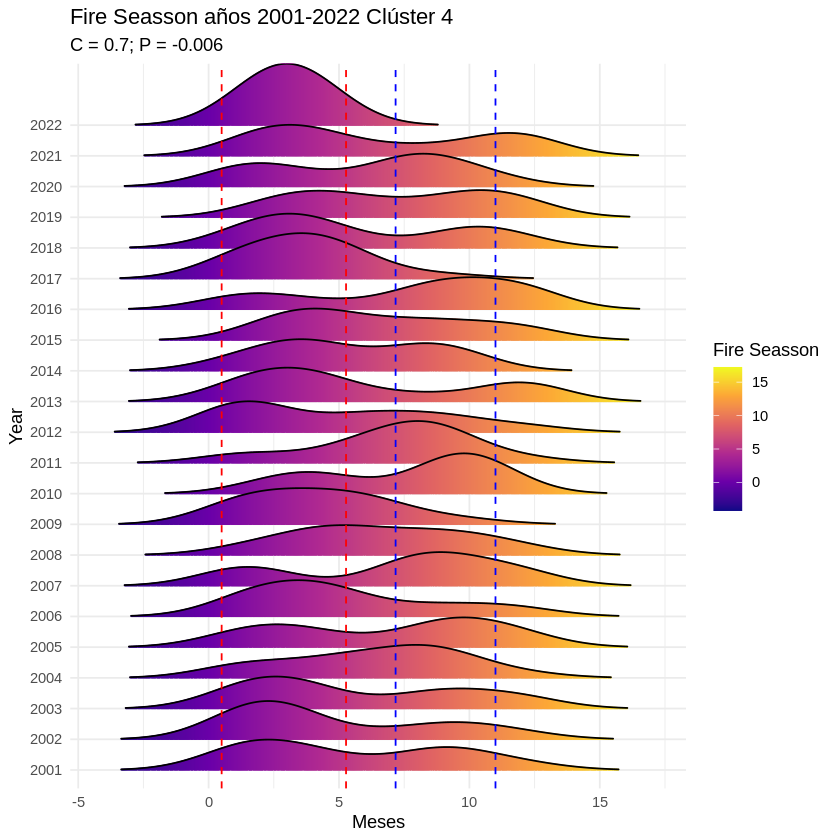

In [640]:
startFireSeasson = 1.90
desvstart =startFireSeasson -1.40
endFireSeasson = 3.45
desvEnd =endFireSeasson + 1.82

startFireSeasson2 = 7.17
desvstart2 =startFireSeasson2 
endFireSeasson2 = 9
desvEnd2 =endFireSeasson2 + 2

ggplot(df_pr, aes(x = Meses, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 Clúster 4',
    subtitle = 'C = 0.7; P = -0.006'
  ) +
  geom_vline(xintercept = c(desvstart2, desvEnd2), color = "blue", linetype = "dashed")+
geom_vline(xintercept = c(desvstart, desvEnd), color = "red", linetype = "dashed") +
  scale_color_manual(name = "statistics", values = c(median = "blue", mean = "red")) 
ggsave(paste0('FS','densidades','_cluster_',4,'.png'))


Saving 6.67 x 6.67 in image



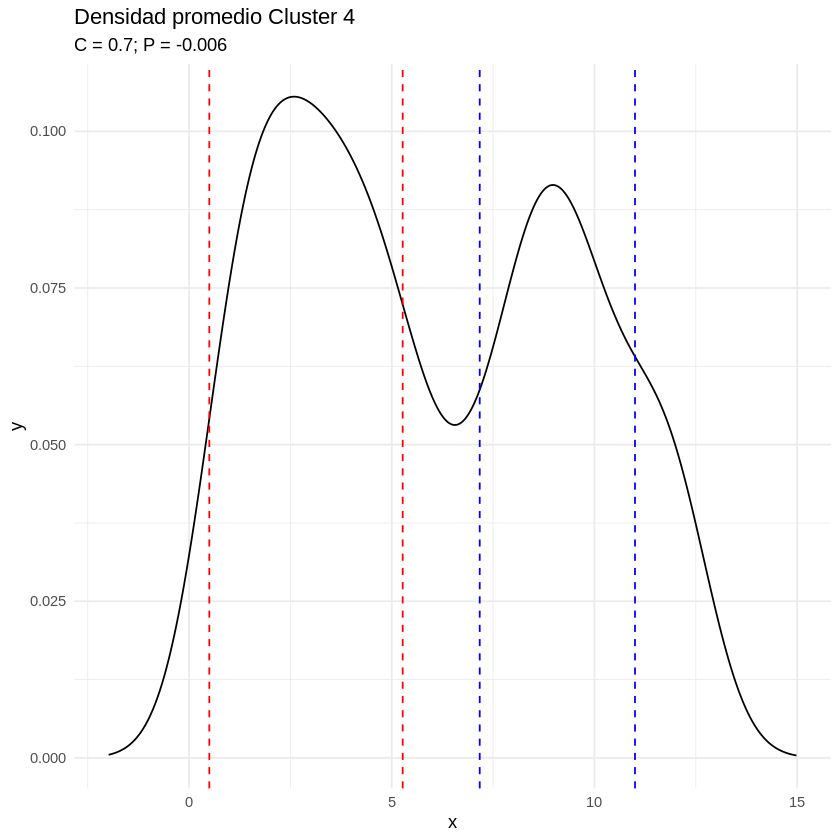

In [642]:
density_data <- density(df_pr$Meses)

# Crear un data frame con los resultados de la densidad
density_df <- data.frame(x = density_data$x, y = density_data$y)

# Crear el gráfico utilizando ggplot2
ggplot(density_df, aes(x = x, y = y)) +
  geom_line() +
  labs(
    title = 'Densidad promedio Cluster 4',
    subtitle = 'C = 0.7; P = -0.006'
  ) +
  geom_vline(xintercept = desvstart, color = 'red', linetype = 'dashed') +
  geom_vline(xintercept = desvEnd, color = 'red', linetype = 'dashed') +
  geom_vline(xintercept = desvstart2, color = 'blue', linetype = 'dashed') +
  geom_vline(xintercept = desvEnd2, color = 'blue', linetype = 'dashed') +
  theme(panel.grid.minor.x = element_line(size = 0.25,
                                          linetype = 1))
ggsave(paste0('FS','densidad promedio','_cluster_',4,'.png'))

densidades de 1 a 12

### Visualización caracterísiticas FS

In [1]:
library("visualizeR")

quantity2clim <- function(quantity, what, ref.grid, backperm = NULL) {
  if(!is.null(backperm)){quantity <- quantity[backperm]}
  mat <- matrix(quantity, nrow = 1)  
  ref.grid$Data <- mat2Dto3Darray(mat, x = ref.grid$xyCoords$x , y = ref.grid$xyCoords$y)
  attr(ref.grid$Data, "climatology:fun") <- what
  return(ref.grid)
}

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



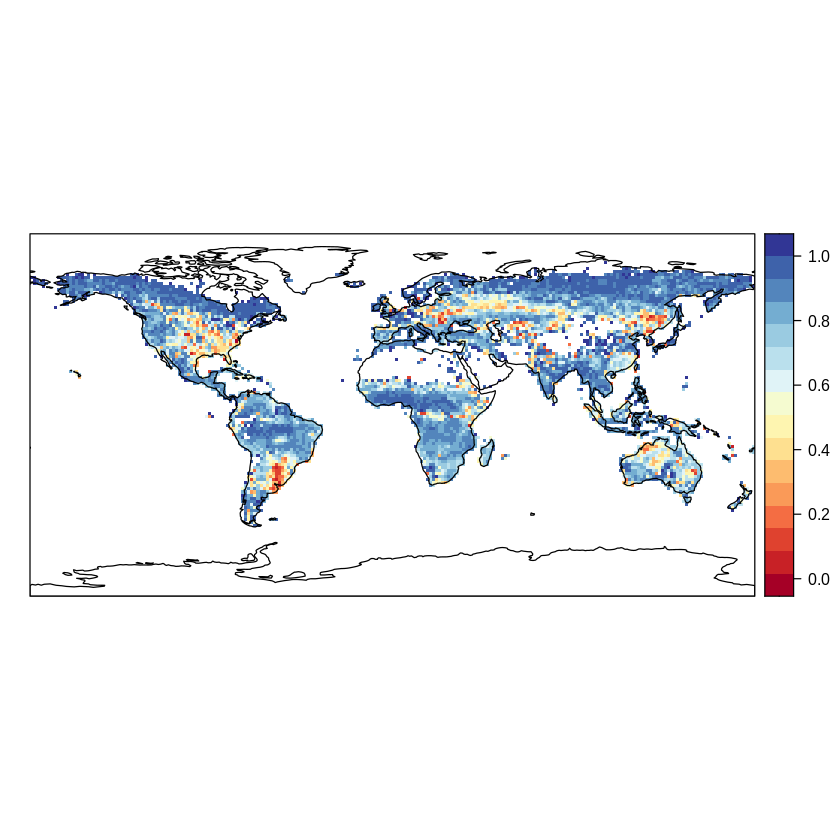

In [2]:
grid_ref = get(load("../1.Upscaling/upscaling_ba/ba_grid_15.Rdata"))
#grid_fba = get(load("../1.Upscaling/upscaling_fba/ fba_grid_5.Rdata"))
df_grid = get(load("../3.Datos generados/dataframes/df_grid_15.Rdata"))
df_grid$C[df_grid$FsOrNot == 0] <- NA
df_grid$P[df_grid$FsOrNot == 0] <- NA
df_grid<- df_grid[order(df_grid$X),]
SeassonalConcentrationViz <- quantity2clim(quantity = df_grid$'C', what = 'Concentration', ref.grid = grid_ref, backperm = NULL)
fig_SeassonalConcentrationViz <- spatialPlot(SeassonalConcentrationViz, backdrop.theme = 'coastline')
fig_SeassonalConcentrationViz

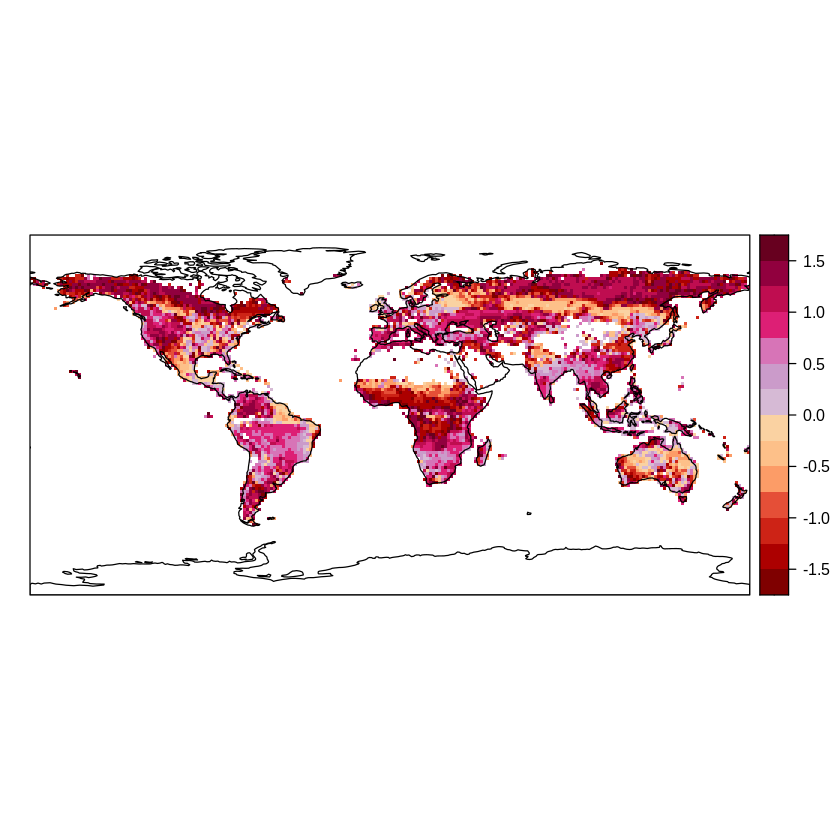

In [4]:
SeassonalTiming_viz <- quantity2clim(quantity = df_grid$'P', what = 'Concentration', ref.grid = grid_ref, backperm = NULL)

library(visualizeR)
library(RColorBrewer)

#display.brewer.all() ## Para ver todas las paletas disponibles

orrd <- brewer.pal(n = 9, name = "OrRd")[3:9]
purd <- brewer.pal(n = 9, name = "PuRd")[3:9]
circular.colors <- c(rev(orrd), purd)

fig_SeassonalTiming_viz <- spatialPlot(SeassonalTiming_viz,
            backdrop.theme = 'coastline',
            at = seq(-1.75,1.75,0.25),
            col.regions = colorRampPalette(circular.colors)(16))
fig_SeassonalTiming_viz

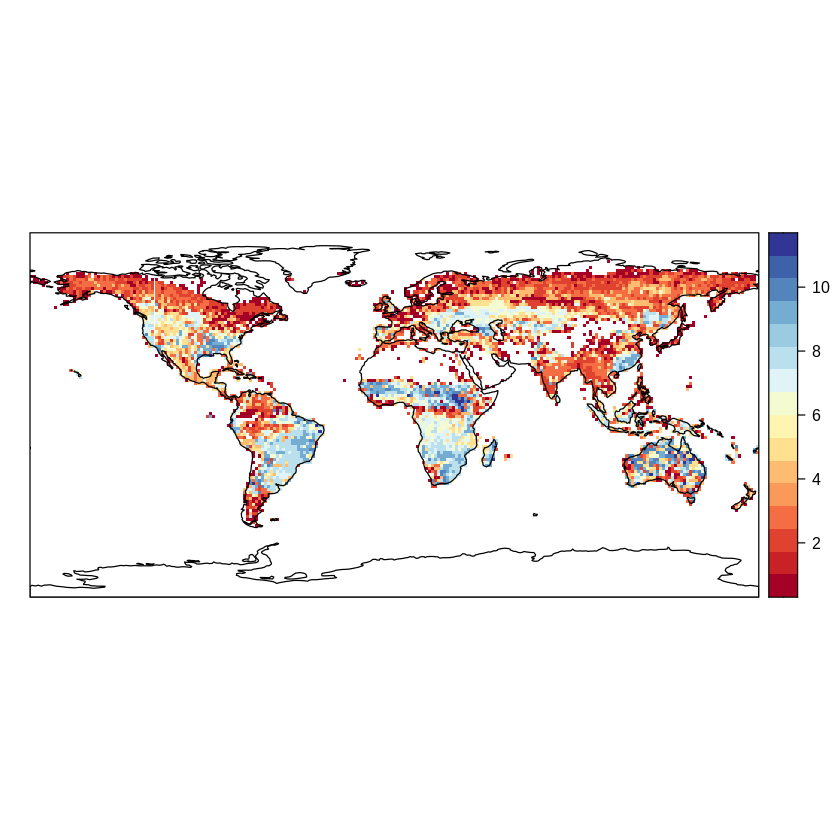

In [9]:
SeassonalLengthViz <- quantity2clim(quantity = df_grid$'L', what = 'Length', ref.grid = grid_ref, backperm = NULL)
fig_SeassonalLengthViz <- spatialPlot(SeassonalLengthViz, backdrop.theme = 'coastline')
fig_SeassonalLengthViz

In [10]:
plotname <- "duracion_ejemplo.pdf"
pdf(plotname)
fig_SeassonalLengthViz
dev.off()

png 
  2

In [5]:
plotname <- "concentracion_ejemplo.pdf"
pdf(plotname)
fig_SeassonalConcentrationViz
dev.off()

png 
  2

In [6]:
plotname <- "phase_ejemplo.pdf"
pdf(plotname)
fig_SeassonalTiming_viz
dev.off()

png 
  2

bimodales

In [47]:
vector_bimodales <- c()
for (row in 1:nrow(df_grid)){
    if (!is.na(df_grid$MainStart[row])){
        vector_bimodales <- c(vector_bimodales, 0)
    } else if (!is.na(df_grid$SencondStart[row])){
        vector_bimodales <- c(vector_bimodales, 1)
        }else if (is.na(df_grid$MainStart[row]) & is.na(df_grid$SencondStart[row])){
        vector_bimodales <- c(vector_bimodales, NA)
        }
    }

In [8]:
vector_bimodales <- c()
for (row in 1:nrow(df_grid)){
    if (is.na(df_grid$MainStart[row])){
        vector_bimodales <- c(vector_bimodales, NA)
    }else{
    if (!is.na(df_grid$SencondStart[row])){
        vector_bimodales <- c(vector_bimodales, 1)
    } else {
        vector_bimodales <- c(vector_bimodales, 0)
        }
    }
}

In [9]:
sum(na.omit(vector_bimodales))

[1] 11309

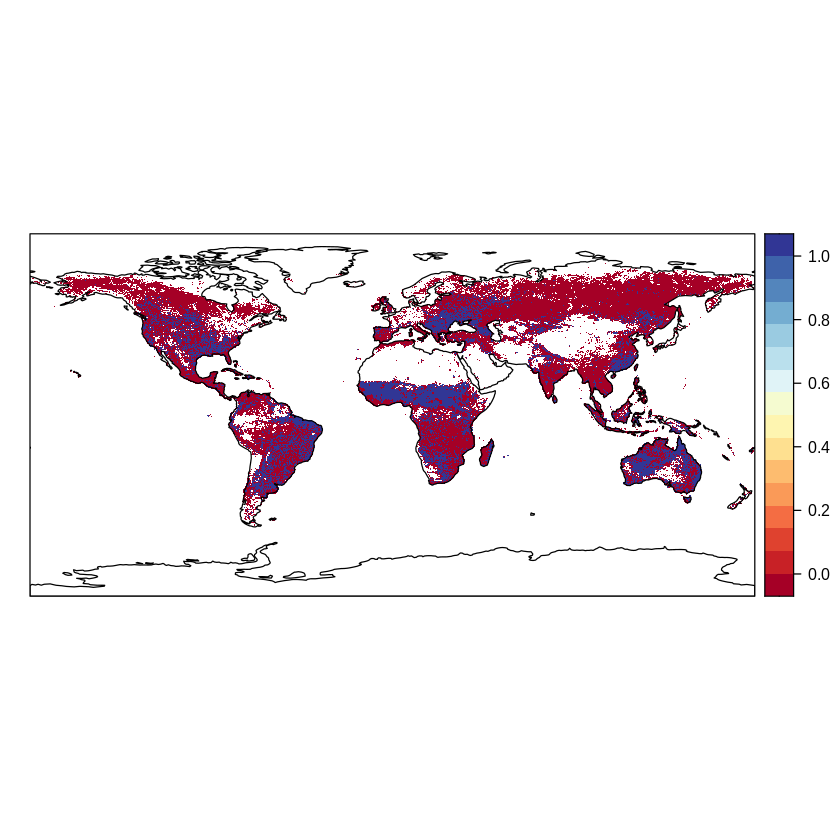

In [16]:
bimodales_viz <- quantity2clim(quantity = vector_bimodales, what = 'Bimodales', ref.grid = grid_ref, backperm = NULL)
bimodales_fig <- spatialPlot(bimodales_viz, backdrop.theme = 'coastline')
bimodales_fig

In [17]:
plotname <- "bimodales_ejemplo.pdf"
pdf(plotname)
bimodales_fig
dev.off()

png 
  2